In [1]:
import random
import gymnasium as gym
import numpy as np
import torch
import matplotlib.pyplot as plt
import rl_utils
import SAC

env_name = 'Pendulum-v1'
env = gym.make(env_name)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]
action_bound = env.action_space.high[0]
random.seed(0)
np.random.seed(0)
# env.seed(0)
torch.manual_seed(0)

actor_lr = 3e-4
critic_lr = 3e-3
alpha_lr = 3e-4
num_episodes = 100
hidden_dim = 128
gamma = 0.99
tau = 0.005
buffer_size = 100000
minimal_size = 1000
batch_size = 64
target_entropy = -env.action_space.shape[0]
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f'device: {device}')
replay_buffer = rl_utils.ReplayBuffer(buffer_size)

agent = SAC.SACContinuous(state_dim, hidden_dim, action_dim, action_bound,
                          actor_lr, critic_lr, alpha_lr, target_entropy, tau,
                          gamma, device)
return_list = rl_utils.train_off_policy_agent(env, agent, num_episodes,
                                              replay_buffer, minimal_size,
                                              batch_size)


device: cuda


Iteration 0:   0%|          | 0/10 [00:00<?, ?it/s]/root/autodl-tmp/code/python/learn_sac/SAC.py:71: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  state = torch.tensor([state], dtype=torch.float).to(self.device)
Iteration 9: 100%|██████████| 10/10 [00:28<00:00,  2.87s/it, episode=100, return=-107.483]


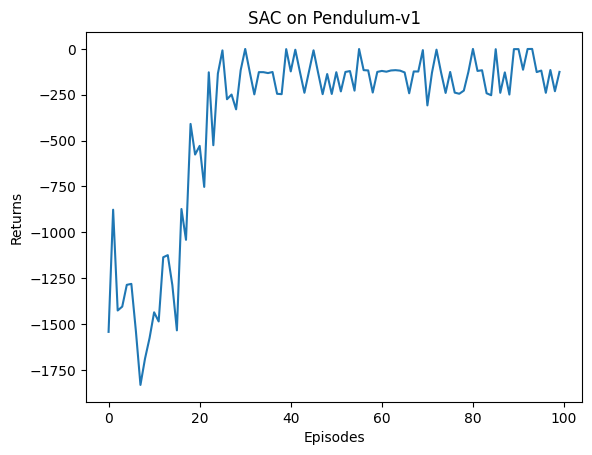

In [2]:
episodes_list = list(range(len(return_list)))
plt.plot(episodes_list, return_list)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title(f'SAC on {env_name}')
plt.show()

In [3]:
import random
import gymnasium as gym
import numpy as np
import torch
import matplotlib.pyplot as plt
import rl_utils
import SAC

env_name = 'CartPole-v0'
env = gym.make(env_name)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n
random.seed(0)
np.random.seed(0)
# env.seed(0)
torch.manual_seed(0)

actor_lr = 1e-3
critic_lr = 1e-2
alpha_lr = 1e-2
num_episodes = 200
hidden_dim = 128
gamma = 0.98
tau = 0.005
buffer_size = 10000
minimal_size = 500
batch_size = 64
target_entropy = -1
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f'device: {device}')
replay_buffer = rl_utils.ReplayBuffer(buffer_size)

agent = SAC.SAC(state_dim, hidden_dim, action_dim,
                actor_lr, critic_lr, alpha_lr, target_entropy, tau,
                gamma, device)
return_list = rl_utils.train_off_policy_agent(env, agent, num_episodes,
                                              replay_buffer, minimal_size,
                                              batch_size)


/root/miniconda3/lib/python3.12/site-packages/gymnasium/envs/registration.py:512: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(


device: cuda


Iteration 0:   0%|          | 0/20 [00:00<?, ?it/s]

Iteration 9: 100%|██████████| 20/20 [00:37<00:00,  1.90s/it, episode=200, return=193.000]


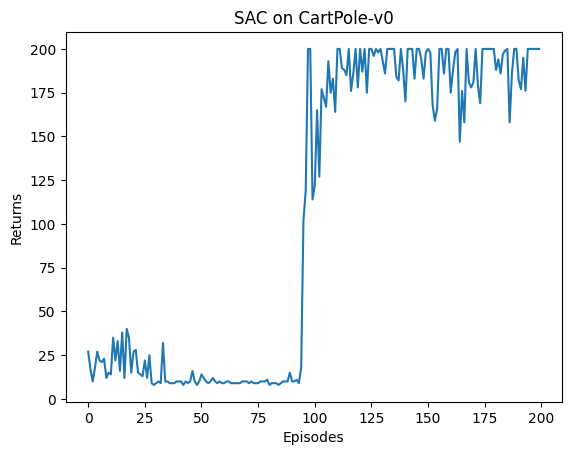

In [4]:
episodes_list = list(range(len(return_list)))
plt.plot(episodes_list, return_list)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title(f'SAC on {env_name}')
plt.show()